# (Dataset Exploration)
## by (Govardhan K)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area. also, it represents trips taken by members of the Ford Go Bike service for month of February of 2019. Data consists of info about trips taken by service's members, their types, their age, their gender, duration of trips etc.

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [63]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [64]:
df.shape # shape of dataset

(183412, 16)

In [65]:
df.info() # to see any missing values and data type issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### 1. start_time & end_time to be converted to date time
#### 2. start_station_id & end_station_id to be converted to object
#### 3. user_type, member_gender, bike_share_for_all_trp to be converted to category
#### 4. member_birth_year to be converted to int

In [66]:
df.isna().sum() # to see the count of missing values in each variable

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [67]:
df.duplicated().sum() # no duplicate rows

0

In [68]:
df.sample(10) # to visually investigate for any issues with random sampling

duration_sec                start_time                  end_time  \
21249            246  2019-02-26 09:28:04.5330  2019-02-26 09:32:10.6340   
36557            988  2019-02-23 15:44:18.8290  2019-02-23 16:00:47.1890   
38852           1046  2019-02-23 10:51:16.9980  2019-02-23 11:08:43.4430   
63920            428  2019-02-20 13:28:27.5230  2019-02-20 13:35:35.6090   
56256            689  2019-02-21 09:07:04.7450  2019-02-21 09:18:34.6380   
106473          1451  2019-02-13 17:51:11.2370  2019-02-13 18:15:22.7910   
34023            335  2019-02-24 09:45:57.0850  2019-02-24 09:51:32.5700   
43267            454  2019-02-22 16:47:43.5500  2019-02-22 16:55:18.3110   
72145            311  2019-02-19 16:53:51.9990  2019-02-19 16:59:03.3460   
126106           167  2019-02-10 21:06:22.7020  2019-02-10 21:09:09.7150   

        start_station_id                                start_station_name  \
21249                3.0      Powell St BART Station (Market St at 4th St)   
36557               64.0                              5th St at Brannan St   
38852               17.0  Embarcadero BART Station (Beale St at Market St)   
63920              343.0                               Bryant St at 2nd St   
56256               80.0                             Townsend St at 5th St   
106473              18.0                     Telegraph Ave at Alcatraz Ave   
34023               62.0                       Victoria Manalo Draves Park   
43267                9.0                            Broadway at Battery St   
72145              243.0                       Bancroft Way at College Ave   
126106              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
21249                37.786375              -122.404904            47.0   
36557                37.776754              -122.399018            74.0   
38852                37.792251              -122.397086            86.0   
63920                37.783172              -122.393572             5.0   
56256                37.775235              -122.397437            59.0   
106473               37.850222              -122.260172           178.0   
34023                37.777791              -122.406432           363.0   
43267                37.798572              -122.400869           370.0   
72145                37.869360              -122.254337           249.0   
126106               37.789677              -122.390428            28.0   

                                       end_station_name  end_station_latitude  \
21249                             4th St at Harrison St             37.780955   
36557                             Laguna St at Hayes St             37.776435   
38852                           Market St at Dolores St             37.769305   
63920      Powell St BART Station (Market St at 5th St)             37.783899   
56256                       S Van Ness Ave at Market St             37.774814   
106473                              Broadway at 30th St             37.819381   
34023   Salesforce Transit Center (Natoma St at 2nd St)             37.787492   
43267                               Jones St at Post St             37.787327   
72145                         Russell St at College Ave             37.858473   
126106                     The Embarcadero at Bryant St             37.787168   

        end_station_longitude  bike_id   user_type  member_birth_year  \
21249             -122.399749      335  Subscriber             1981.0   
36557             -122.426244     6216  Subscriber             1994.0   
38852             -122.426826     5113  Subscriber             1974.0   
63920             -122.408445     5845  Subscriber             1968.0   
56256             -122.418954     3211  Subscriber             1983.0   
106473            -122.261928     4513  Subscriber             1957.0   
34023             -122.398285     5322  Subscriber             1994.0   
43267     

### Cleaning the data type issues

#### 1. start_time & end_time to be converted to date time

#### Define
Start time & end time are in object format, they need to be converted to datetime to be used in analyst of travel time

#### Code

In [69]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#### Test

In [70]:
print (type(df['start_time'][0]))
print (type(df['end_time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 2. start_station_id & end_station_id to be converted to object

#### Define
start_station_id and end_station_id are in flat. They can be converted into oject since they are not use to perform any calculations

#### Code

In [71]:
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')

#### Test

In [72]:
print (type(df['start_station_id'][0]))
print (type(df['end_station_id'][0]))

<class 'str'>
<class 'str'>


#### 3. user_type, member_gender, bike_share_for_all_trip to be converted to category

#### Define
user_type, member_gender, bike_share_for_all_trp are in object. they can be converted to category type due to limited types

#### Code

In [73]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

#### Test

In [74]:
df[['user_type', 'member_gender', 'bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   user_type                183412 non-null  category
 1   member_gender            175147 non-null  category
 2   bike_share_for_all_trip  183412 non-null  category
dtypes: category(3)
memory usage: 537.8 KB


In [75]:
#### missing values
missing_max = df.isna().sum().max()
missing_percent = missing_max/df.shape[0]*100
print ('total count of missing values : {}'.format(missing_max))
print ("missing values percentage is : {}".format(missing_percent))

total count of missing values : 8265
missing values percentage is : 4.506248228033062


#### There is hardly 4.5% of values missing. I am assuming this data will not make a big difference in our analysis process. Hence, dropping¶


In [76]:
df = df.dropna()
df.shape[0]

174952

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [78]:
# save the cleaned data into a seperate variable
df_clean = df.copy()

#### Additionally, we can extract more features from start_time and end_time columns such as weekday, week, month, date and year to better about the 'Ford Go Bikes' business

In [79]:
#df['start_year'] = df['start_time']
df_clean['start_time_year'] = df_clean['start_time'].dt.year
df_clean['end_time_year'] = df_clean['end_time'].dt.year
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['end_time_month'] = df_clean['end_time'].dt.strftime('%B')
df_clean['start_time_date'] = df_clean['start_time'].dt.day
df_clean['end_time_date'] = df_clean['end_time'].dt.day
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_weekday'] = df_clean['end_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   
5             93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   
5               37.770407              -122.391198          323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   
5                            Broadway at Kearny             37.798014  ...   

   end_time_year  start_time_month end_time_month  start_time_date  \
0           2019          February          March               28   
2           2019          February          March               28   
3           2019          February          March               28   
4           2019          February          March               28   
5           2019          February          March               28   

  end_time_date start_time_weekday  end_time_weekday  start_time_hour  \
0             1                Thu               Fri               17   
2             1                Thu               Fri               12   
3             1                Thu               Fri               17   
4             1                Thu               Fri               23   
5             1                Thu               Fri               23   

  end_time_hour duration_min  
0             8          869  
2             5         1030  
3             4          608  
4             0           26  
5             0           29  

[5 rows x 27 columns]

In [80]:
df_clean['age'] = (df_clean['start_time_year'] - df_clean['member_birth_year']).astype(int)

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [82]:
df_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  174952.000000           174952.000000            174952.000000   
mean      704.002744               37.771220              -122.351760   
std      1642.204905                0.100391                 0.117732   
min        61.000000               37.317298              -122.453704   
25%       323.000000               37.770407              -122.411901   
50%       510.000000               37.780760              -122.398279   
75%       789.000000               37.797320              -122.283093   
max     84548.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude        bike_id  \
count         174952.000000          174952.000000  174952.000000   
mean              37.771414            -122.351335    4482.587555   
std                0.100295               0.117294    1659.195937   
min               37.317298            -122.453704      11.000000   
25%               37.770407            -122.411647    3799.000000   
50%               37.781010            -122.397437    4960.000000   
75%               37.797673            -122.286533    5505.000000   
max               37.880222            -121.874119    6645.000000   

       member_birth_year  start_time_year  end_time_year  start_time_date  \
count      174952.000000         174952.0       174952.0    174952.000000   
mean         1984.803135           2019.0         2019.0        15.312337   
std            10.118731              0.0            0.0         8.033926   
min          1878.000000           2019.0         2019.0         1.000000   
25%          1980.000000           2019.0         2019.0         8.000000   
50%          1987.000000           2019.0         2019.0        15.000000   
75%          1992.000000           2019.0         2019.0        22.000000   
max          2001.000000           2019.0         2019.0        28.000000   

       end_time_date  start_time_hour  end_time_hour   duration_min  \
count  174952.000000    174952.000000  174952.000000  174952.000000   
mean       15.311714        13.456165      13.609533      11.241461   
std         8.034127         4.734282       4.748029      27.371269   
min         1.000000         0.000000       0.000000       1.000000   
25%         8.000000         9.000000       9.000000       5.000000   
50%        15.000000        14.000000      14.000000       8.000000   
75%        22.000000        17.000000      18.000000      13.000000   
max        28.000000        23.000000      23.000000    1409.000000   

                 age  
count  174952.000000  
mean       34.196865  
std        10.118731  
min        18.000000  
25%        27.000000  
50%        32.000000  
75%        39.000000  
max       141.000000

from above statistics, its observed that the maximum age is 141. this is unreal. We will need to drop the people with age above 90 with an assumption old age people dont go for rides 

In [83]:
df_clean = df_clean[df_clean['age']<90]

In [84]:
df_clean['age'].describe()

count    174875.000000
mean         34.160274
std           9.968641
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: age, dtype: float64

In [85]:
df_clean.to_csv('forgobike_clean.csv')
df_clean = pd.read_csv('forgobike_clean.csv')

### What is the structure of your dataset?

> There are 174,952 transactions in the dataset. 

a] There are two variables ['start_time, 'end_time'] are in datetime format which talk about journey start and end times
    
    i. From these variables, additional start and end variables such as year, month, date, weekday, hour are computed
    
b] Start and end location latitude and longitude are in float

c] user_type, member_gender, bike_share_for_all_trip are in category


### What is/are the main feature(s) of interest in your dataset?

> I am interested more in weekday, month, user_type variables to understand the peak days or months and also the type of users to chalk the marketing strategies

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe age, duration, trip where it started and ended as well as user_type and member_gender will have more importance in my investigation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

##### What are the top 20 Start Stations of Ford GoBikes rides take place?

In [86]:
# top 20 Start Stations
start_station = df_clean['start_station_name'].value_counts().head(20)
start_order = start_station.index
start_station_sub = df_clean.loc[df_clean['start_station_name'].isin(start_station.index)]
gen_color = sns.color_palette()[0]

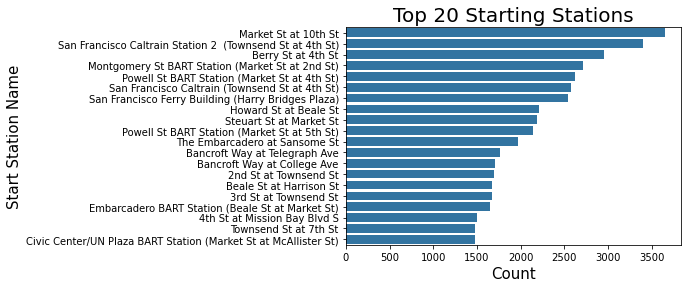

In [114]:
sns.countplot(data=start_station_sub, y='start_station_name', color = gen_color, order = start_order);
plt.title('Top 20 Starting Stations', size = 20)
plt.xlabel('Count', size=15)
plt.ylabel('Start Station Name', size=15);

The top station where the rides start is 'Market St at 10th St' with above 3500 rides

#### What are the top 20 End Stations of Ford GoBikes rides take place?

In [88]:
# Top 20 End stations

end_station = df_clean['end_station_name'].value_counts().head(20)
end_order = end_station.index
end_station_sub = df_clean.loc[df_clean['end_station_name'].isin(end_station.index)]


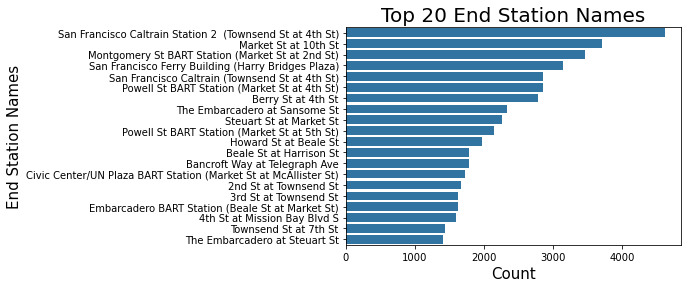

In [118]:
sns.countplot(data=end_station_sub, y='end_station_name', order = end_order, color = gen_color)
plt.title('Top 20 End Station Names', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('End Station Names', size=15);

The top end station being San Francisco Caltrain Station 2 (Townsend St at 4th St) with about 4500 rides. 
Surprisingly this is the second top stations where rides start

#### What is the distributions of users age?

(array([30608., 61883., 41828., 18943., 11068.,  7092.,  2498.,   767.,
           76.,   112.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

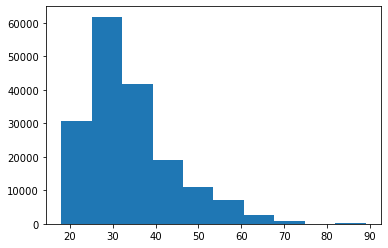

In [121]:
# let us look at the age of members
plt.hist(data = df_clean, x='age') # the data is right skewed

The distributions follows unimodal with right skew. Let us try to set the bins to its max and will see how the distributions looks next

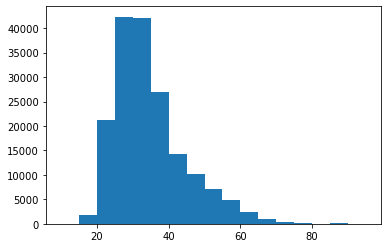

In [123]:
bins = np.arange(10, df_clean['age'].max()+10, 5)
plt.hist(data = df_clean, x = 'age', bins = bins); # distributions looks right skewed and unimodal with higher b/w 20-40 years

The distributions is looking some better. However, it still right skewed with a bump at 25 to 35 ages. It indicates mostof the users fall between 25 to 35

#### What is the count of user_type?

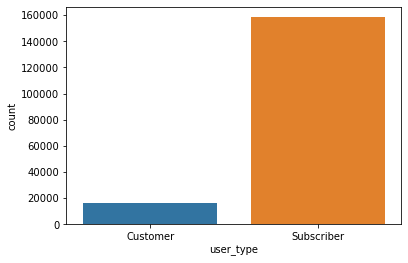

In [92]:
# let's look at the distribution of user type

sns.countplot(data = df_clean, x = 'user_type'); # there is a huge difference

In [126]:
df_clean['user_type'].value_counts() # count of user type

Subscriber    158315
Customer       16560
Name: user_type, dtype: int64

from the figure, it looks like there is a huge difference between customer and subscribers of the bikes. However, its the difference is intuitive

#### What is the count of gender amongs users?

<AxesSubplot:xlabel='member_gender', ylabel='count'>

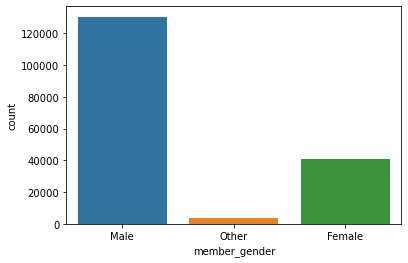

In [94]:
# let us look at the member_gender

sns.countplot(data = df_clean, x = 'member_gender')

In [129]:
df_clean['member_gender'].value_counts()

Male      130439
Female     40791
Other       3645
Name: member_gender, dtype: int64

Its intuitive that the males users are the most

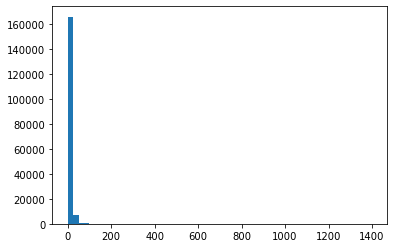

In [96]:
# let's take a look at the trip duration in mins
bins = np.arange(0, df_clean['duration_min'].max()+10, 25)
plt.hist(data = df_clean, x = 'duration_min', bins = bins);

###### There is a long tail to the right with huge bump at start. Let's apply log transformation

(60.0, 85000.0)

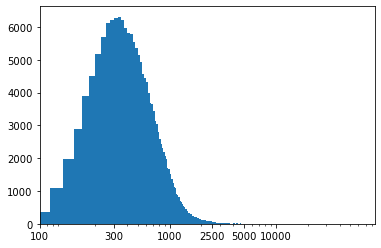

In [97]:
bins = np.arange(0, df_clean['duration_sec'].max()+10, 25)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins);
plt.xscale('log')
xticks = [100, 300, 1000, 2500, 5000, 10000];
xmarks = [60, 300, 1000, 2500, 5000, 10000];
plt.xticks(xmarks, xticks);
plt.xlim(60, 85000)

The curve is unimodal with a peak between 250 to 500

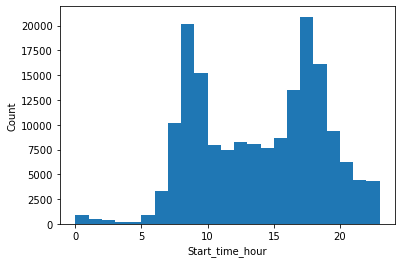

In [134]:
# Distribution of start hours
bins = np.arange(0, df_clean['start_time_hour'].max()+1, 1)
plt.hist(data = df_clean, x='start_time_hour', bins= bins); # this looks like bimodal with peaks at 9 and 18 hours
plt.xlabel('Start_time_hour')
plt.ylabel('Count');

The distribution looks following a bimodal with peaks at 9 AM and 6PM.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Age: The distribution is right skewed with a peak between 25 to 35

> Duration: The distribution is right skewed with  a bump at the starting. We are not getting the right pitcure. Hence,  I applied   the log transformation on the x axis. The distribution looks normally distributed with a peak between 250-500

> Start_time: The distribution is bi-modal with peaks at 9 and 6 PM. It is presumed that the users are mostly the employees.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Duration: The distribution is right skewed with  a bump at the starting. We are not getting the right pitcure.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### I will be investigating the relationship between duration and the other variables

(100.0, 5000.0)

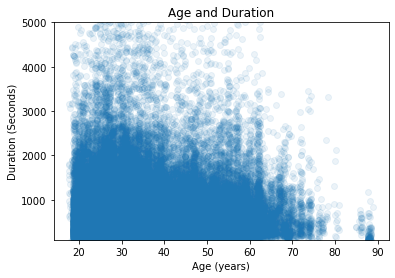

In [100]:
sns.regplot(data=df_clean,x='age',y='duration_sec', fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Duration');
plt.ylim(100, 5000) 

The duration of the trip is seen higher in young age, its getting reduce as the age increases

Text(0.5, 1.0, 'Duration of Trip by Member_gender')

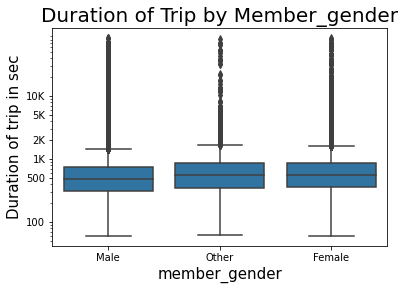

In [101]:
sns.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color = gen_color)
plt.yscale('log')
yticks = [100, 500, 1000, 2000, 5000, 10000]
ylabel = ['100', '500', '1K', '2K', '5K', '10K']
plt.yticks(yticks, ylabel);
plt.xlabel('member_gender', size = 15)
plt.ylabel('Duration of trip in sec', size = 15)
plt.title('Duration of Trip by Member_gender', size = 20)

#### it appears the male users have shorter trip duration

Text(0.5, 1.0, 'Duration of Trip by user type')

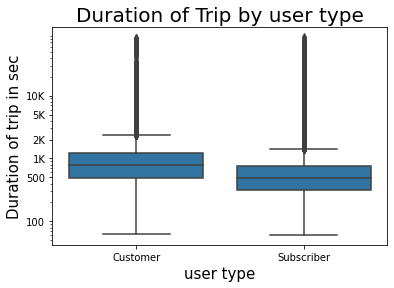

In [102]:
# relationship between duration and the user type
sns.boxplot(data = df_clean, x='user_type', y = 'duration_sec', color = gen_color)
plt.yscale('log')
yticks = [100, 500, 1000, 2000, 5000, 10000]
ylabel = ['100', '500', '1K', '2K', '5K', '10K']
plt.yticks(yticks, ylabel);
plt.xlabel('user type', size = 15)
plt.ylabel('Duration of trip in sec', size = 15)
plt.title('Duration of Trip by user type', size = 20)

#### It appears the customers without subscriptions have longer trip duration

In [103]:
#### let's look at the age of genders

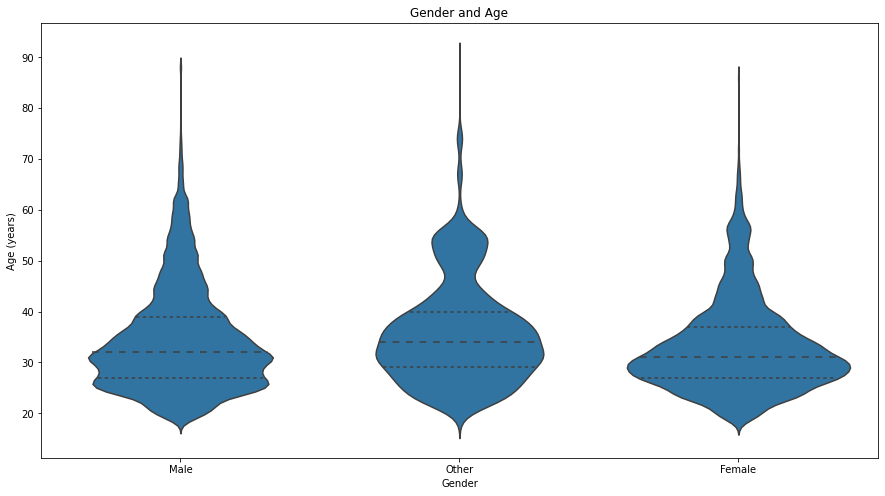

In [104]:
plt.figure(figsize=[15,8])
sns.violinplot(data=df_clean,x='member_gender',y='age', color = gen_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel ('Age (years)');
plt.title('Gender and Age');

#### Most female and male users fall below 35

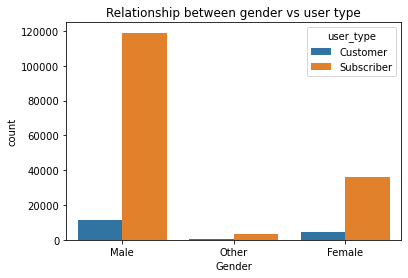

In [105]:
# let us look at the relationship between gender and user type

sns.countplot(data = df_clean, x = 'member_gender', hue = 'user_type');
plt.title('Relationship between gender vs user type')
plt.xlabel('Gender');

There are more males are subscribers, but there is no strong relationship between gender and user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Age vs duration: The duration of the trip is seen higher in young age, its getting reduce as the age increases

> Gender vs duration: Male users have shorter duration of trip

> User type vs duration: subscribed users have shorter duration of trip

> Age vs Gender: Most female and male users fall below 35


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> males have higher subscription rate

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

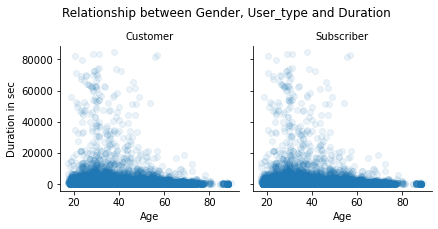

In [111]:
# Let us see the relationship between age, duration and user type

g = sns.FacetGrid(data = df_clean, col = 'user_type', height = 3)
g.map(sns.regplot, data = df_clean, x= 'age', y='duration_sec', fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12});
plt.suptitle('Relationship between Gender, User_type and Duration')
g.set_axis_labels('Age', 'Duration in sec')
g.set_titles('{col_name}')
plt.subplots_adjust(top = 0.8)

From the above plots, its understood that there is no effect of age user type due to age and duration

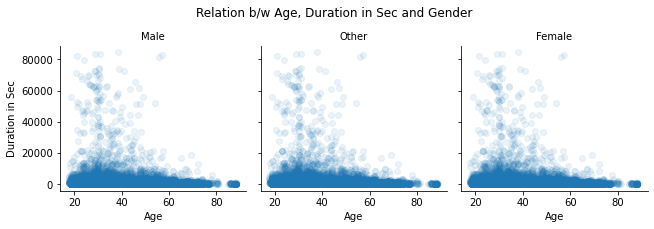

In [107]:
# let's look at the relationship between age, duration and gender
g = sns.FacetGrid(data = df_clean, col= 'member_gender', height = 3)
g.map(sns.regplot, data = df_clean, x ='age', y = 'duration_sec', x_jitter=0.4, fit_reg=False, scatter_kws= {'alpha':1/12});
g.set_titles('{col_name}')
g.set_axis_labels('Age', "Duration in Sec")
plt.suptitle('Relation b/w Age, Duration in Sec and Gender')
plt.subplots_adjust(top = 0.8)

There is no effect of gender on duration and age

Text(0.5, 1.0, 'Relation b/w Duration_sec, gender and user_type')

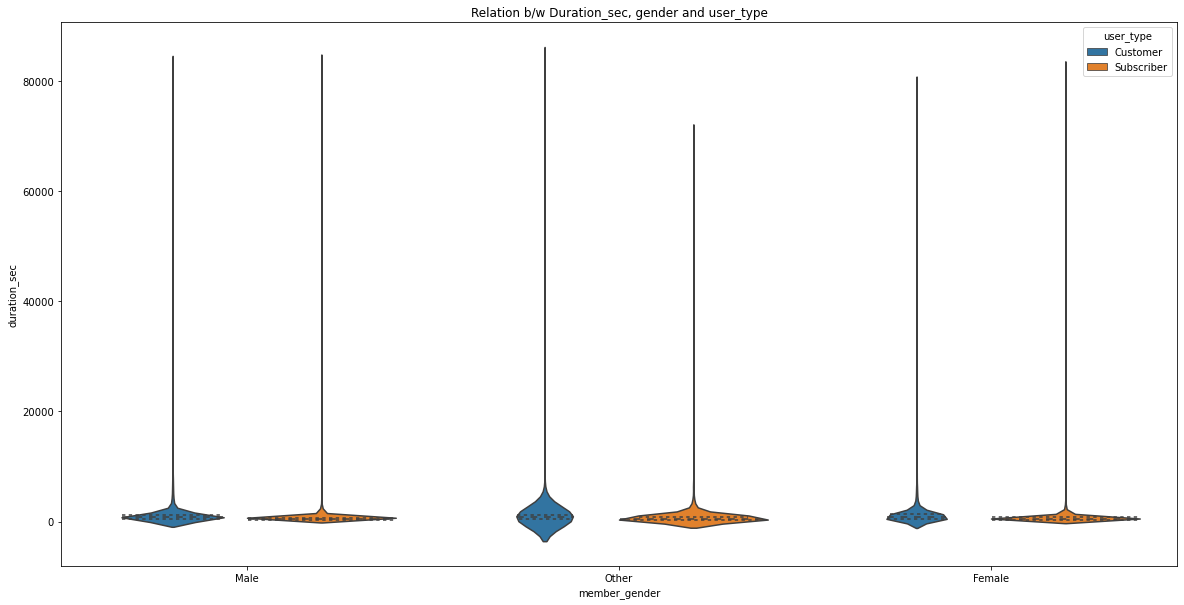

In [108]:
# let us see the relationship between gender, duration and user_type

plt.figure(figsize=[20,10])

sns.violinplot(data = df_clean, x = 'member_gender', y = 'duration_sec', hue = 'user_type', inner= 'quartile')
plt.title('Relation b/w Duration_sec, gender and user_type' )

#the duration looks the same in all genders among user types

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is hardly any relationshiop we could get in multivariate analysis

### Were there any interesting or surprising interactions between features?

> There are no insights brought with multivariate analysis. We were able to ring as much relationships as we can in bivariate analysis

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!